In [2]:
%load_ext autoreload
%autoreload 2
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from EntryExitModel import EntryExitModel

model = EntryExitModel()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing the model:
calling .setup()


## BAIN-SYLOS-LABINI-MODIGLIANI MODEL ##

***Model presentation:***

The Bain-Sylos-Modigliani model investigates the reality of strategic barriers to market entry. 
It is based on five main assumptions:

**Assumption1**: regards the number of firms. The firms considered are competitive and they are two: a monopolist firm 'M' and a potential entrant 'E'. 

**Assumption 2**: products are homogeneous: every firm $i \in I$ produces one good only;

**Assumption 3**: defines the market demand. The market demand is determined by linear consumers' preferences $p = P(Q)$, where p is the demand price and Q is the quantity demanded by the market, defined by the following features:
$$P(Q) = d - bQ \;\;\; \forall Q \in[0,\frac{d}{b}]$$
$$P(Q) = 0 \; \text{per} \; Q\geq\frac{d}{b}$$

**Assumption 4**: Costs. The production costs of firm $i \in I$ are defined by the function $C(q_i) = cq_i + F$, where $q_i$ is the quantity produced and sold by a generic firm i, c is the marginal cost, and F is the fixed cost.

**Assumption 5**: Temporal structure. At time $t_0$, firm M decides how much to produce; at time $t_1$, once firm E has acknowledged the quantity chosen by firm M, it decides how much to produce with a constraint: if in stage 1, at $t_0$, firm M has decided to produce a quantity that is greater or equal to Y, then E does not enter the market (its optimal quantity is 0).

**Assumption 6**: Strategies. The strategy of a firm M is the real number $q_M \in Q_M = [0, \frac{a}{b}]$, where $a = d - c$; the strategy of a firm E is a function defined in $Q_M$ and having value in $[0, \frac{a}{b} - q_M]$. The strategic space of solutions is then given by $Q = Q_M \times Q_E$. Every function in $Q_E$ has the property that if $q_M \geq Y$, then $q_E = 0$. 


Assumptions 1, 4 and 5 define the market players and their possible strategies. The other assumptions allow the determination of the two firms' profits and the possible outcomes of the game. These are: 
$ \; \Pi_j = [a - b(q_M + q_E)]q_j - F \;$, with $j = M,E$ 
and $a = d - c$. The game is thus well defined.

## Analytical solution:

 **Model resolution**
The model is solved as a two-staged strategic game by backward induction. The study of the second stage allows for a clear interpretation of the meaning of Y. In the last stage firm E, the potential entrant, decides whether or not to enter the market based on its profit function. Firm E's profit function is:

In [3]:
model.profit_e_sym()

-F + q_e*(a - b*(q_e + q_m))

In the second stage the entrant chooses the quantity that maximizes its profit. The first order condition for the maximization of its profits implies a reaction function like this: 

In [4]:
reaction_e, profit_2nd_stage_e, Y  =model.second_stage_of_the_game()
reaction_e

(a - b*q_m)/(2*b)

Resulting, the profit of firm E in case of entry is as follows: 


In [5]:
profit_2nd_stage_e

-F + (a - b*q_m)**2/(4*b)

 Firm E will decide to enter the market if and only if $ \Pi_E > 0$ or if and only if $  q_M < Y$ where $Y$ is defined as:

In [6]:
Y

(a*b - 2*sqrt(F*b**3))/b**2

Now, let's analyze the first stage of the game: in this stage firm M determines the amount to produce, taking into account the threshold Y determined by $a$,$b$, and $F$. Two are the possible scenarios: either the potential entrant has entered the market in the second stage or it it has not.
The profit function of firm M is piece-wise continous:  


In [7]:
profit_m_sym = model.profit_m_sym()
profit_m_sym

Piecewise((-F + q_m*(a - b*(q_e + q_m)), q_m < (a*b - 2*sqrt(F*b**3))/b**2), (-F + q_m*(a - b*q_m), True))

The optimal quantity of firm M changes depending on the value of Y. It can be profitable to let the potential entrant enter the market, to block the entry or to act as a pure monopolist. 

In [8]:
profit_m, profit_m_e, profit_m_ne, block_condition, deterred_condition, accomodation_condition, acc_profit, crit_points1, crit_points2 = model.first_stage_of_the_game()

If the threshold for the second firm to enter the market (Y) is smaller than the quantity that a pure monopolist would choose, the entrant will be blocked. This implies that the first firm, by operating as a monopolist and maximizing its profit, will also block the entry of the second firm. The situation is illustrated in Figure 3

In [9]:
block_condition

F >= a**2/(16*b)

Entry is deterred when Firm M produces Y instead of the monopoly quantity to prevent Firm E from entering the market (Figure 2), maximizing its profit. This happens when: 

In [10]:
deterred_condition

(a**2/(16*b) > F) & (a**2*(3 - 2*sqrt(2))/(32*b) <= F)

There is entry accomodation when It is profitable for firm M to produce a quantity that allow firm E to enter in the market (Figure 1)

In [11]:
accomodation_condition

(0 < F) & (a**2*(3 - 2*sqrt(2))/(32*b) > F)

**M's profit as a function of demand, at different levels of F:**

Next figures 1 to 3 show the profit of firm M as a function of the quantity the firm chooses, which in turn depends on firm E's threshold Y. The series portrays how M's optimal choice changes as F increases. 

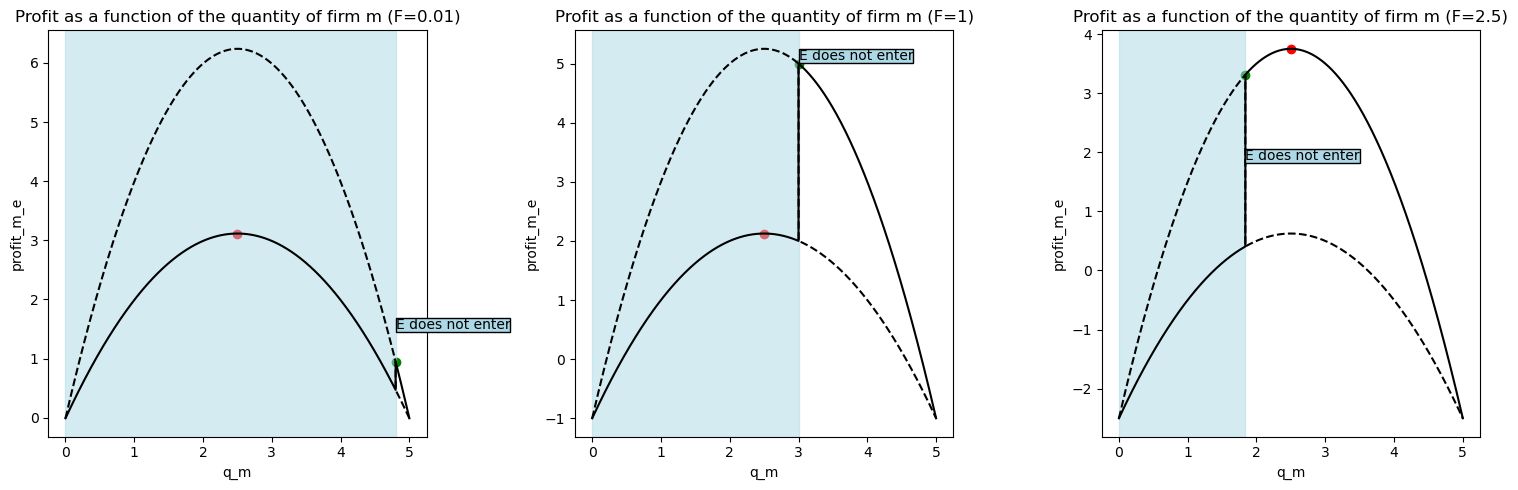

In [12]:
model.plot_profit_m()

***Figures 1,2 and 3***: 
Whether firm M chooses a quantity that accomodates or blocks E's entry depends on the threshold Y (the green dot) which in turn depends on a, b, and F. As a and b are determined, Y and thus firm M's optimal choice depend crucially on F, the fixed cost to entry: as F increases, E is less likely to enter the market due to the higher cost to entry. So, Y, its threshold quantity will decrease and so will do the quantity M needs to produce to deter E's entry. That is, the probability that $q_M \geq Y$ increases. As a result, M produces a lower quantity and obtains higher profits. 

Looking at the figures, only when $F=0.01$ firm E does enter the market, whereas when $F=1$ and when $F=2.5$, E does not enter it. Indeed, only in the first scenario firm M maximises its profits by producing a quantity that is lower than Y, thus allowing E to enter the market. In the second and thirs scenarios, firm M reaches its maximum profit by producing a quantity that is equal than Y (in the second) and greater  than Y (in the third), thus deterring and blocking E's entry, respectively.

**M's profit as a function of F:**

Figure 4 displays firm M's profit as a function of F, the fixed cost to entry endured by firm E. 

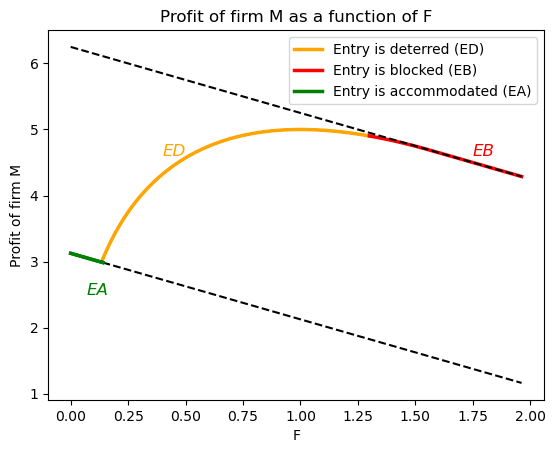

In [13]:
model.plot_profit_m_2()

**Figure 4:** The figure shows three possible outcomes from firms E's and M's strategic interaction. Either E's entry is accomodated, it is deterred or it is blocked. Entry is accomodated for lower values of F, when the quantity M should produce to deters E's entry would be too large to benefit from it. As F increases, M deterring E's entry becomes more likely but crucially depends on its profit function. When F reaches or pasess a certain critical value (1.25 with our choice of key parameters), E's entry is blocked as it is always optimal for M to produce a quantity that is larger than Y.

## Numerical solution:

**Solution algorithm**
We configure our algorithm following the logic of backward induction: first, we define the demand, cost and profit functions, then we consider the optimal choice of the entrant firm E in the second stage and compute its optimal quantity and the threshold Y; accordingly, we calculate the optimal quantity chosen by the incumbent firm M in the first stage. Finally, we use the same numerical methods to solve the extension of Stackelberg. However, in this model no quantity M's optimal choice is only based on E's optimal quantity and no Y exists. As a result, we only evaluate the optimal quantity of the follower, and, accordingly, that of the leader.

1. The `__init__()` method in the class `EntryExitModel()`initializes the model by setting up parameters and symbolic variables. The SimpleNamespace class from the types module is used to create two namespaces: `self.par` and `self.symbolic`, needed to organize and store attributes of the class. Next, the `setup()` method organizes the parameters and variables within the class instance's par and symbolic namespaces, respectively, for easy access and manipulation. In particular, a, b, c, d and F are defined in `par` as predetermined parameters; also, a, b, F, $q\_m$ and $q\_e$ are defined as symbolic variables, using the `SymPy` library, so as to perform their manipulation in mathematical expressions.

2. The demand, cost and profit functions are forumlated in respectively `demand(self,q_m,q_e)`, `cost(self,q)` and `profit_m(self,q_m)`. The functions take `self`, `q_m` and `q_e` as arguments. 

3. The optimal quantity for the entrant firm E is formulated: `entrant_opt(self,q_m)`. First, an objective function `obj` is defined for the profit of E as the negative of its profit function with respect to their demand quantities. Then, the optimization routine `SciPy`'s `minimize` is employed. This minimizes the objective function `obj` subject to a bounded constraint. For the constraint is bounded, the Sequential Least Squares Programming (`SLSQP`) method is chosen for optimization. The optimizer starts with an initial guess for the optimization variables, then it iteratively improves the solution by generating a sequence of trial points and terminates when a pre-specified tolerance level for the objective function is met, that is when there is convergence. 

4. Next, `SciPy`'s `optimize.root_scalar` is employed to find the threshold quantity `Y(self)` for the entrant firm. The method finds the root of the objective function `obj`; it begins the root-finding process setting an initial guess and then employs the Newton-Raphson method to find the root of the function. The algorithm returns a root that represents the threshold quantity of the incumbent firm for the entrant firm to enter the market.

5. Once the threshold quantity `Y` for the entrant firm E is found, the optimal quantity for the incumbent firm, i.e. `m_opt(self,multiple_start=False,initial_condition_norandom=True,initial_condition_random=False)` is calculated. Following the same steps we described to evaluate the reaction function of the entrant firm, we define an objecive function `obj` and then we iniate the optimization routine of `SciPy`'s `minimize` through SLSQP, as we impose bounds and an inequality constraint. In addition, this time we consider different starting conditions to provide flexibility in how the optimization is initialized. In particular, we configure an optimization algorithm from multiple random starting points, a single starting point at the threshold quantity Y(), and a single random starting point. In the first case of `multiple starting points`, `NumPy`'s `random.uniform()`'s is used to generate 100 random starting points, over which the `SLSQP` algorithm iterates to find the optimal quantity while satisfying the inequality constraint defined by the lambda function. In the second case, optimization is performed with a single starting point, which is set to the threshold quantity `Y()` of the incumbent firm; in the third case, a `single random starting point` is generated and 
optimization is performed in a similar manner to the first case.

6. Lastly, we solve the Stackelberg extension. Like in Modigliani, we configure a two-staged optimization through `SciPy`'s `minimize` and we employ the Sequential Least Squares Programming (`SLSQP`) method since we have bounds and an inequality constraint. Inside each stage, we define objective functions ` obj` for the profits of the follower and for that of the leader (respectively in the first and in the second stage) as the negative of their profit functions. However, unlike in Modigliani, in Stackelberg the firms are both inside the market, so `Y` does not exist and the follower E's only choice is that of an optimal quantity to maximise its profits. Accordingly, in the last stage of the algorithm, firm M (the leader) chooses its own. Finally, based on this value, its equilibrium profit is calculated.


We will now proceed to fully solve the model using numerical methods:

***EA: Entry is accomodated***: let's first solve the case in which entry is accomodated:

In [14]:
model.par.F = 0.01
q_m, q_e=model.m_opt()

Optimal quantity for the incumbent firm: 2.499999936257229
Equilibium profit for the incumbent firm: 3.1149999999999984
Optimal quantity for the entrant firm: 1.2500000318713853
Equilibium profit for the entrant firm: 1.5525000796784645


/Users/iariorlandi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_zeros_py.py:318: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


 ***ED: Entry is deterred***: the case of deterred entry is analysed. For this case, we added a multiple start input when It comes to optimizing firm M's profit because when entry is deterred, the maximum is not an interior point but an extremum point, meaning that, depending on the initial condition, the optimization algorithm may or may not converge to this maximum. 
 We will now try 3 different approeaches: 
 1) Random initial condition 
 2) Multiple start approach
 3) Use Y as initial condition, since we know that it's the optimal quantity when entry is deterred (cheating).

A random initial condition does not converge to the global maximum but to a local one. It converges to a situation in which entry is accomodate even if in this case it is more profitable to deter the entry. This can be seen below, since $a=d-c=5$ and $F=1$, we know that the maximum is achieved when $q_m = Y$.

In [15]:
model.par.F = 1
q_m, q_e =model.m_opt(multiple_start=False,initial_condition_norandom=False,initial_condition_random=True)

Optimal quantity for the incumbent firm: 2.5
Equilibium profit for the incumbent firm: 2.125
Optimal quantity for the entrant firm: 1.25
Equilibium profit for the entrant firm: 0.5625


A multiple-start approach, instead, allows the algorithm to converge to our solution (It requires 1 minute and 51 seconds to run). 

In [16]:
q_m, q_e =model.m_opt(multiple_start=True,initial_condition_norandom=False,initial_condition_random=False)

Optimal quantity for the incumbent firm: 2.902382303666101
Equilibium profit for the incumbent firm: 5.088088481696361
Optimal quantity for the entrant firm: 0
Entrant does not enter in the market


Our last case is when we use  $Y$ as the initial condition, since we know that it's the optimal quantity when entry is deterred. However, it's not always possible to know the solution of the model before running the numerical algorithm, meaning that, this is not an ideal solution, so we prefer the multiple-start approach.

In [17]:
q_m, q_e =model.m_opt(multiple_start=False,initial_condition_norandom=True,initial_condition_random=False)

Optimal quantity for the incumbent firm: 2.902382303793118
Equilibium profit for the incumbent firm: 5.088088481594143
Optimal quantity for the entrant firm: 0
Entrant does not enter in the market


***EB: Entry is blocked***: The case in which entry is blocked can be represented as follow:

In [18]:
model.par.F = 2.5
q_m, q_e =model.m_opt()

Optimal quantity for the incumbent firm: 2.5000000000000018
Equilibium profit for the incumbent firm: 3.75
Optimal quantity for the entrant firm: 0
Entrant does not enter in the market


## An extension of Modigliani:

The first model allows entrance and exit from M's market to firm E, the second mover in our two-staged sequential game. What if the potential entrant always entered the market? The Modigliani model would turn into Stackelberg's model.

In the market modeled in Stackelberg there are two firms: one leader and one follower. The leader makes its decisions first, taking into account the potential reactions of the follower; the follower observes the leader's decision and then makes its own decision, usually in a non-cooperative manner. We view this scenario as a result of entry accomodation: as M always accomodates E's entry, the two firms follow a strategic sequential interaction in which M is the leader and E the follower. Conversely, we could conceive Stackelberg, a model in which two firms always coexist or in which the potential entrant's entry is always accomodated by the incumbent, as the baseline model and the Modigliani model, one in which E's entry can either be accomodated, deterred or blocked by M, as its extension.

**Stackelberg's market equilibrium:** How does market equilibrium change when we remove the possibility that firm E does not enter he market? We implement the scenario known as Stackelberg's model by assuming that in stage 2 firm E is in the market. The only difference with respect to firm M is the timing of their optimization. 

In [19]:
q_m_ext, q_e_ext = model.m_opt_ext()

Optimal quantity for the leader firm: 2.5
Equilibium profit for the leader firm: 0.625
Optimal quantity for the follower firm: 1.25
Equilibium profit for the follower firm: -0.9375


By removing the decision for firm E to enter or exit the market we will end up to be in the same equilibrium that we would have when there is entry accomodation: the leader produce an higher quantity thanks to the first moving advantage.